EVENTS IN PARIS By: SAMI SALAMEH and RUTH INGA

THE PURPOSE OF THIS CODE IS TO ANALYSE THE EVENTS HAPPENING IN PARIS THIS YEAR.

Project objectives: 

1.data gathering / dataset.

2.data analytics.

3.data visualization.

THIS EXERCISE PURPOSE IS THE FOLLOWING:

a-Sort the list of events by categories( show the grading in columns and also in a diagram)

b-display the events between free and paid.

c-Time and duration of events.

d-Rank the most popular event.

e-compare the events based on their category.

f-check the events entry methods (reservation,recommendation or open event).

g-display the location of the events on Paris map.


LIBRAIRIES USED

- Numpy
- Pandas
- Seaborn
- Matplotlib
- datetime
- dateutil
- folium
- descartes

CSV DATA FILE

- que-faire-a-paris-.csv downloaded from  www.opendata.paris.fr

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import parser
import pandas as pd
import folium
from pandas import DataFrame
from folium.plugins import MarkerCluster
import descartes
import matplotlib.cm as cm 
#here we are importing the librairies we might need

In [2]:
#here we are importing the csv file, naming it "dframe" and showing  some lines in the columns.
dframe=pd.read_csv('que-faire-a-paris-.csv',sep=';')
dframe.head(5)

,ID,URL,Titre,Chapeau,Description,Catégorie,Mots clés,Date de début,Date de fin,Occurrences,...,Téléphone de réservation,Email de réservation,Type de prix,Détail du prix,Image de couverture,URL de l'image,Crédit de l'image,Texte alternatif de l'image,Programmes,Date de mise à jour
0,92223,https://quefaire.paris.fr/92223/atelier-de-par...,"Atelier de Paris, centre de danse de la Cartou...",L'équipe de l'Atelier de Paris / CDCN vient à ...,<p>Sera présenté notamment leur prochain spect...,Spectacles -> Danse,Musique;Bibliothèques;En famille,2019-11-07T19:00:00+01:00,2019-11-07T20:30:00+01:00,2019-11-07T19:00:00+01:00_2019-11-07T20:30:00+...,...,NaN,NaN,gratuit,NaN,https://opendata.paris.fr/api/v2/catalog/datas...,https://quefaire-api.paris.fr/images/61309,Grégory Batardon,Ruth Childs,NaN,2019-10-18T17:44:23+02:00
1,92219,https://quefaire.paris.fr/92219/bestiaire-de-b...,Bestiaire de bestioles,Rencontre/Coloriage,<p><b>Aude Villerouge</b> puise son inspiratio...,Animations -> Autre animation,Insolite;Ados;Enfants,2019-11-06T19:00:00+01:00,2019-11-06T21:00:00+01:00,2019-11-06T19:00:00+01:00_2019-11-06T21:00:00+...,...,143368119.0,librairie@lesediteursassocies.com,gratuit,NaN,https://opendata.paris.fr/api/v2/catalog/datas...,https://quefaire-api.paris.fr/images/61306,Solo ma non troppo,Bestiaire de bestioles,NaN,2019-10-18T17:03:07+02:00
2,83030,https://quefaire.paris.fr/83030/a-la-recherche...,A la recherche des écrivains disparus: Proust ...,Conférences littéraires des cycles culturels d...,"<p style="""" class="""">Partez sur les traces de ...",Animations -> Conférence / Débat,Bibliothèques,2019-10-22T19:00:00+02:00,2019-10-22T20:30:00+02:00,2019-10-22T19:00:00+02:00_2019-10-22T20:30:00+...,...,NaN,NaN,gratuit,NaN,https://opendata.paris.fr/api/v2/catalog/datas...,https://quefaire-api.paris.fr/images/54834,cr MC,proust et gide,NaN,2019-10-18T13:28:42+02:00
3,92134,https://quefaire.paris.fr/92134/didon-et-enee-...,Didon et Enée de Purcell par Opéra Côté Choeur,"Cet opéra de chambre mêle magistralement, tell...",<p>Quelques chaises et autant de voiles suffir...,Spectacles -> Opéra / Musical,Les Nuits;Musique;En famille,2020-01-11T20:00:00+01:00,2020-01-12T19:00:00+01:00,2020-01-11T20:00:00+01:00_2020-01-11T22:00:00+...,...,624367112.0,NaN,payant,"Tarif plein : 19 euros\nEtudiants, groupes : 1...",https://opendata.paris.fr/api/v2/catalog/datas...,https://quefaire-api.paris.fr/images/26771,Opéra Comique - Fabrice Labit,La leçon de Christophe Grapperon,NaN,2019-10-18T10:46:53+02:00
4,92159,https://quefaire.paris.fr/92159/lcdr-party-2,LCDR Party #2,Artichaut Records x Loom débarquent aux Disqua...,"<p>La Cour de Récré, Artichaut Records et Loom...",Concerts -> Hip-Hop,Musique,2019-11-07T20:00:00+01:00,2019-11-08T02:00:00+01:00,2019-11-07T20:00:00+01:00_2019-11-08T02:00:00+...,...,NaN,NaN,payant,Accès concert 5EUR,https://opendata.paris.fr/api/v2/catalog/datas...,https://pro.sowprog.com/downloads?name=img_eve...,NaN,NaN,NaN,2019-10-18T09:52:41+02:00


In [3]:
#this is to check the titles of the columns so we can select what is relevant to us
dframe.columns 

Index(['ID', 'URL', 'Titre', 'Chapeau', 'Description', 'Catégorie',
       'Mots clés', 'Date de début', 'Date de fin', 'Occurrences',
       'Description de la date', 'Nom du lieu', 'Adresse du lieu',
       'Code postal', 'Ville', 'Coordonnées géographiques', 'Accès PMR',
       'Accès mal voyant', 'Accès mal entendant', 'Transport',
       'Nom de contact', 'Téléphone de contact', 'Email de contact',
       'Url de contact', 'URL Facebook associée', 'URL Twitter associée',
       'Type d'accès', 'URL de réservation', 'Téléphone de réservation',
       'Email de réservation', 'Type de prix', 'Détail du prix',
       'Image de couverture', 'URL de l'image', 'Crédit de l'image',
       'Texte alternatif de l'image', 'Programmes', 'Date de mise à jour'],
      dtype='object')

In [4]:
#we construct a new DataFrame"Paris_Events" using  dframe by selecting only certain categories
Paris_Events = DataFrame(dframe, columns=['Titre','Catégorie','Date de début','Date de fin','Type de prix','Catégorie'])
Paris_Events.head(10)

,Titre,Catégorie,Date de début,Date de fin,Type de prix,Catégorie
0,"Atelier de Paris, centre de danse de la Cartou...",Spectacles -> Danse,2019-11-07T19:00:00+01:00,2019-11-07T20:30:00+01:00,gratuit,Spectacles -> Danse
1,Bestiaire de bestioles,Animations -> Autre animation,2019-11-06T19:00:00+01:00,2019-11-06T21:00:00+01:00,gratuit,Animations -> Autre animation
2,A la recherche des écrivains disparus: Proust ...,Animations -> Conférence / Débat,2019-10-22T19:00:00+02:00,2019-10-22T20:30:00+02:00,gratuit,Animations -> Conférence / Débat
3,Didon et Enée de Purcell par Opéra Côté Choeur,Spectacles -> Opéra / Musical,2020-01-11T20:00:00+01:00,2020-01-12T19:00:00+01:00,payant,Spectacles -> Opéra / Musical
4,LCDR Party #2,Concerts -> Hip-Hop,2019-11-07T20:00:00+01:00,2019-11-08T02:00:00+01:00,payant,Concerts -> Hip-Hop
5,"La Jam à Tao, tous les jeudis",Concerts -> Jazz,2019-10-24T21:00:00+02:00,2019-11-29T01:00:00+01:00,gratuit,Concerts -> Jazz
6,FESTIVAL JAZZ'N'KLEZMER w/ PAD BRAPAD + JEWISH...,Concerts -> Musiques du Monde,2019-11-28T19:00:00+01:00,2019-11-28T23:00:00+01:00,payant,Concerts -> Musiques du Monde
7,Le cercle des dévoreurs,Animations -> Lecture / Rencontre,2019-01-23T17:00:00+01:00,2019-11-27T19:00:00+01:00,gratuit,Animations -> Lecture / Rencontre
8,Spectacle Jeune public : J'ai le droit !,Spectacles -> Jeune public,2019-10-23T15:00:00+02:00,2019-10-25T15:45:00+02:00,payant,Spectacles -> Jeune public
9,Stage Hatha Yoga,Animations -> Stage,2019-10-20T16:30:00+02:00,2019-10-20T19:00:00+02:00,payant,Animations -> Stage


In [5]:
#we create a DataFrame to display the most popular events(considering how many times it occured per year)
#We pick the data we want to map and organize it
popular_events = DataFrame(dframe, columns=['ID','Titre','Description','Catégorie','Occurrences'])
popular_events.head(10)

,ID,Titre,Description,Catégorie,Occurrences
0,92223,"Atelier de Paris, centre de danse de la Cartou...",<p>Sera présenté notamment leur prochain spect...,Spectacles -> Danse,2019-11-07T19:00:00+01:00_2019-11-07T20:30:00+...
1,92219,Bestiaire de bestioles,<p><b>Aude Villerouge</b> puise son inspiratio...,Animations -> Autre animation,2019-11-06T19:00:00+01:00_2019-11-06T21:00:00+...
2,83030,A la recherche des écrivains disparus: Proust ...,"<p style="""" class="""">Partez sur les traces de ...",Animations -> Conférence / Débat,2019-10-22T19:00:00+02:00_2019-10-22T20:30:00+...
3,92134,Didon et Enée de Purcell par Opéra Côté Choeur,<p>Quelques chaises et autant de voiles suffir...,Spectacles -> Opéra / Musical,2020-01-11T20:00:00+01:00_2020-01-11T22:00:00+...
4,92159,LCDR Party #2,"<p>La Cour de Récré, Artichaut Records et Loom...",Concerts -> Hip-Hop,2019-11-07T20:00:00+01:00_2019-11-08T02:00:00+...
5,86593,"La Jam à Tao, tous les jeudis",<p>Tous les soirs des concerts à participation...,Concerts -> Jazz,2019-10-24T21:00:00+02:00_2019-10-25T01:00:00+...
6,92068,FESTIVAL JAZZ'N'KLEZMER w/ PAD BRAPAD + JEWISH...,<h4>Pad Brapad (France)</h4><p></p><p>Des cent...,Concerts -> Musiques du Monde,2019-11-28T19:00:00+01:00_2019-11-28T23:00:00+...
7,68723,Le cercle des dévoreurs,"<p>Venez discuter, échanger et partager vos ap...",Animations -> Lecture / Rencontre,2019-01-23T17:00:00+01:00_2019-01-23T19:00:00+...
8,92053,Spectacle Jeune public : J'ai le droit !,<p>Deux journalistes font des recherches sur l...,Spectacles -> Jeune public,2019-10-23T15:00:00+02:00_2019-10-23T15:45:00+...
9,92048,Stage Hatha Yoga,<p><br></p><p> - 1h15 de...,Animations -> Stage,2019-10-20T16:30:00+02:00_2019-10-20T19:00:00+...


In [6]:
# To display how many times the events hapened per year, the times of the events are separated by ";" 
# we count the numbers of   ";"  then add + 1 to include the first date.
# we create two new lists to display the events names and the events occurance.
eventsName=[]
eventsOcc=[]
for ligne in popular_events.itertuples():
    occ=ligne[5].find(';')
    if(occ== -1):
        occ=0
    occ+=1
    eventsName.append(ligne[2])
    eventsOcc.append(occ)

In [7]:
# we add two new lists
popular_events['event name']=eventsName
popular_events['occurrence per year']=eventsOcc

In [8]:
#let's check our new columns
popular_events.columns

Index(['ID', 'Titre', 'Description', 'Catégorie', 'Occurrences', 'event name',
       'occurrence per year'],
      dtype='object')

In [9]:
popular_events.head(4)

,ID,Titre,Description,Catégorie,Occurrences,event name,occurrence per year
0,92223,"Atelier de Paris, centre de danse de la Cartou...",<p>Sera présenté notamment leur prochain spect...,Spectacles -> Danse,2019-11-07T19:00:00+01:00_2019-11-07T20:30:00+...,"Atelier de Paris, centre de danse de la Cartou...",1
1,92219,Bestiaire de bestioles,<p><b>Aude Villerouge</b> puise son inspiratio...,Animations -> Autre animation,2019-11-06T19:00:00+01:00_2019-11-06T21:00:00+...,Bestiaire de bestioles,1
2,83030,A la recherche des écrivains disparus: Proust ...,"<p style="""" class="""">Partez sur les traces de ...",Animations -> Conférence / Débat,2019-10-22T19:00:00+02:00_2019-10-22T20:30:00+...,A la recherche des écrivains disparus: Proust ...,1
3,92134,Didon et Enée de Purcell par Opéra Côté Choeur,<p>Quelques chaises et autant de voiles suffir...,Spectacles -> Opéra / Musical,2020-01-11T20:00:00+01:00_2020-01-11T22:00:00+...,Didon et Enée de Purcell par Opéra Côté Choeur,52


In [10]:
# we will count the number of events by each category
DataFrame(dframe,columns=['Catégorie','Type de prix','count'])
dframe['Count']=1 #we are creating a new column named count with numeric value of 1
dframe_count = dframe[['Catégorie','Type de prix','Count']]
dframe_count = dframe.groupby(['Catégorie','Type de prix'])['Count'].count().reset_index()
dframe_count.head(8)
# we group these two columns to have a clearer information

,Catégorie,Type de prix,Count
0,Animations -> Atelier / Cours,conso,1
1,Animations -> Atelier / Cours,gratuit,216
2,Animations -> Atelier / Cours,payant,124
3,Animations -> Autre animation,gratuit,32
4,Animations -> Autre animation,payant,4
5,Animations -> Balade,gratuit,9
6,Animations -> Balade,payant,7
7,Animations -> Conférence / Débat,gratuit,160


In [11]:
#we will split the [Catégorie] into two lists to make visualisation more clear,so we split by "->"
dframe_count[['category','subcategory']] = dframe_count["Catégorie"].str.split("->", n = 1, expand = True)
del dframe_count['Catégorie']

In [12]:
# display our dataframe
dframe_count.head(10)

,Type de prix,Count,category,subcategory
0,conso,1,Animations,Atelier / Cours
1,gratuit,216,Animations,Atelier / Cours
2,payant,124,Animations,Atelier / Cours
3,gratuit,32,Animations,Autre animation
4,payant,4,Animations,Autre animation
5,gratuit,9,Animations,Balade
6,payant,7,Animations,Balade
7,gratuit,160,Animations,Conférence / Débat
8,payant,224,Animations,Conférence / Débat
9,gratuit,134,Animations,Lecture / Rencontre


In [13]:
dframe_count.columns

Index(['Type de prix', 'Count', 'category', 'subcategory'], dtype='object')

In [14]:
#lets do a table where we highlight the entry type for the events
'''entry=[dframe["Type d'accès"]]
df = df.append({'foo':1, 'bar':2}, ignore_index=True)'''

entry = dframe["Type d'accès"].tolist()
popular_events['entry']=entry
popular_events.head(5)

,ID,Titre,Description,Catégorie,Occurrences,event name,occurrence per year,entry
0,92223,"Atelier de Paris, centre de danse de la Cartou...",<p>Sera présenté notamment leur prochain spect...,Spectacles -> Danse,2019-11-07T19:00:00+01:00_2019-11-07T20:30:00+...,"Atelier de Paris, centre de danse de la Cartou...",1,libre
1,92219,Bestiaire de bestioles,<p><b>Aude Villerouge</b> puise son inspiratio...,Animations -> Autre animation,2019-11-06T19:00:00+01:00_2019-11-06T21:00:00+...,Bestiaire de bestioles,1,libre
2,83030,A la recherche des écrivains disparus: Proust ...,"<p style="""" class="""">Partez sur les traces de ...",Animations -> Conférence / Débat,2019-10-22T19:00:00+02:00_2019-10-22T20:30:00+...,A la recherche des écrivains disparus: Proust ...,1,libre
3,92134,Didon et Enée de Purcell par Opéra Côté Choeur,<p>Quelques chaises et autant de voiles suffir...,Spectacles -> Opéra / Musical,2020-01-11T20:00:00+01:00_2020-01-11T22:00:00+...,Didon et Enée de Purcell par Opéra Côté Choeur,52,conseillee
4,92159,LCDR Party #2,"<p>La Cour de Récré, Artichaut Records et Loom...",Concerts -> Hip-Hop,2019-11-07T20:00:00+01:00_2019-11-08T02:00:00+...,LCDR Party #2,1,conseillee


DATA VISUALISATION

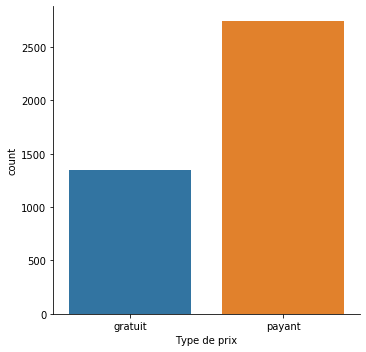

In [15]:
#here we are comparing the events between free and paid events
Paris_Events = dframe.replace(to_replace='conso',value='payant')
sns.catplot('Type de prix',data=Paris_Events,kind="count")
#note that we replaced the conso string by payant to have only two variables of comparison

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

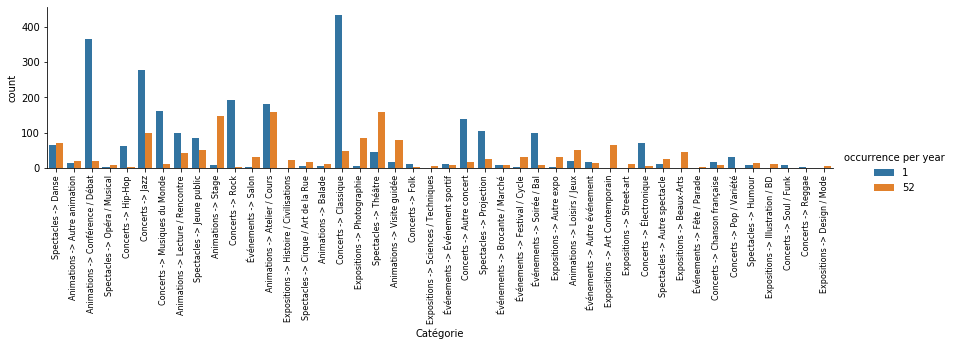

In [16]:
# lets check which categorie has the most events
sns.catplot(x='Catégorie', hue="occurrence per year", data=popular_events, kind="count",aspect=4,height=3)
plt.xticks(rotation=90,size=8)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

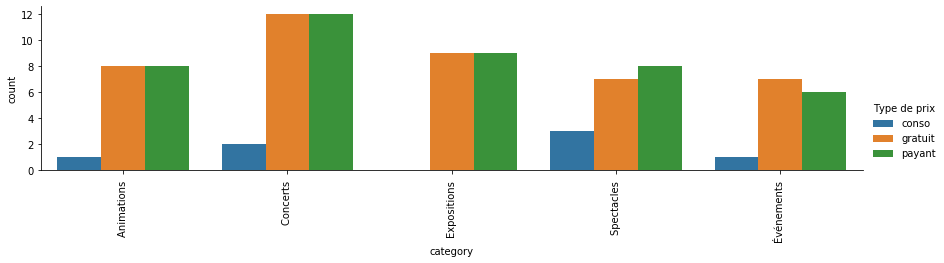

In [17]:
#let us check the events per types of prices for each category
sns.catplot(x='category', hue="Type de prix", data=dframe_count, kind="count",aspect=4,height=3)
plt.xticks(rotation=90,size=10)

cool! almost half of the concerts happening in Paris are free of charge!

In [18]:
#lets calculate the events duration by substracting the end date from the start date, then add it as new column
for ligne in Paris_Events.itertuples():
    Paris_Events['duration']=parser.parse(ligne[9]) - parser.parse(ligne[8])

<Figure size 1152x576 with 0 Axes>

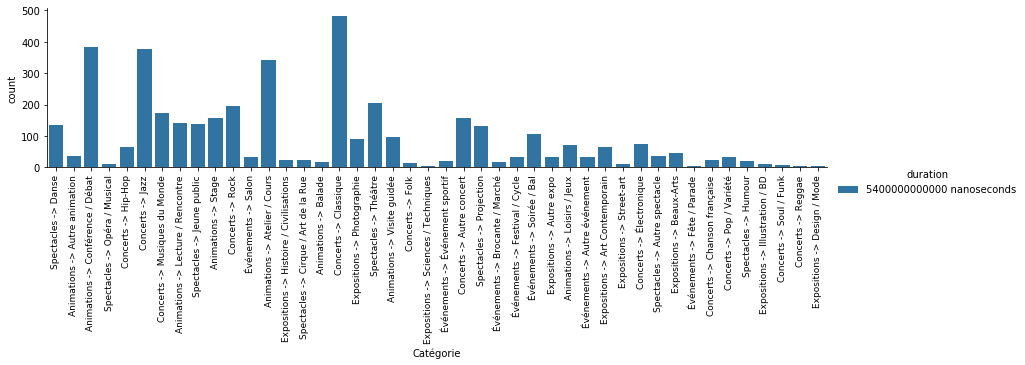

<Figure size 1152x576 with 0 Axes>

In [19]:
#here we check the duration of each categorie to analyse what events people spent the most time at.
'''sns.countplot(x="Catégorie", hue="duration", data=Paris_Events)'''
sns.catplot(x="Catégorie", hue="duration", data=Paris_Events,kind="count",aspect=4,height=3)
plt.xticks(rotation=90,size=9)
plt.figure(figsize=(16,8))
#sorry for the legend in nanoseconds! could not figure out how to change it to hours.

Its interesting to see that jazz,classic music, and debates takes the biggest time portion in Paris!

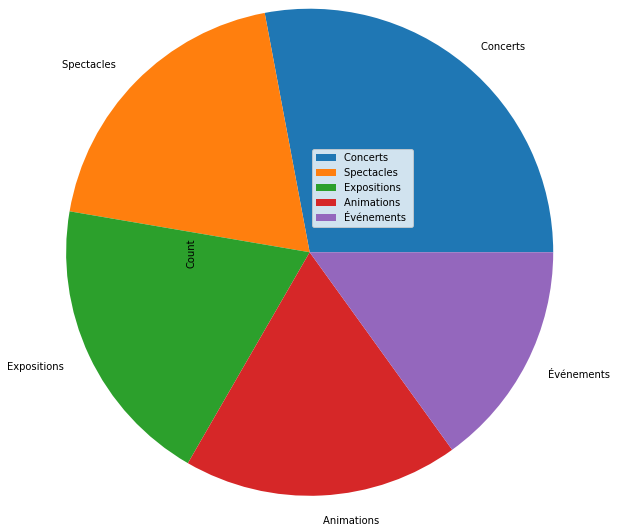

In [20]:
#let's visualise a pie chart for events by category
Key_words = pd.DataFrame(dframe_count['category'].value_counts())
Key_words.columns=['Count']
Key_words.plot(kind='pie', y='Count',legend=True,radius=2.8)

Concerts in Paris occupy the biggest part of the pie!

Text(-2.700000000000003, 0.5, 'EVENEMENT')

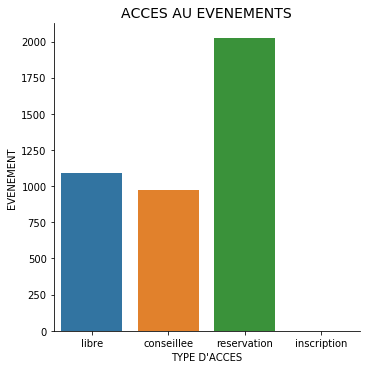

In [21]:
#lets check the events entry types proportions
sns.catplot('entry',data=popular_events,kind="count")
plt.title('ACCES AU EVENEMENTS',size= 14,color='black')
plt.xlabel("TYPE D'ACCES", size=10)
plt.ylabel('EVENEMENT',size=10)

looks like the majority of events needs reservation!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

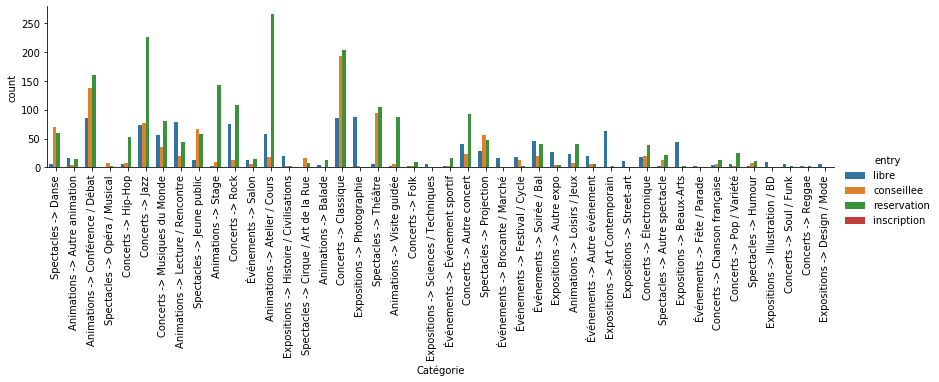

In [22]:
#let us check them based on the category
sns.catplot(x='Catégorie', hue="entry", data=popular_events, kind="count",aspect=4,height=3)
plt.xticks(rotation=90,size=10)

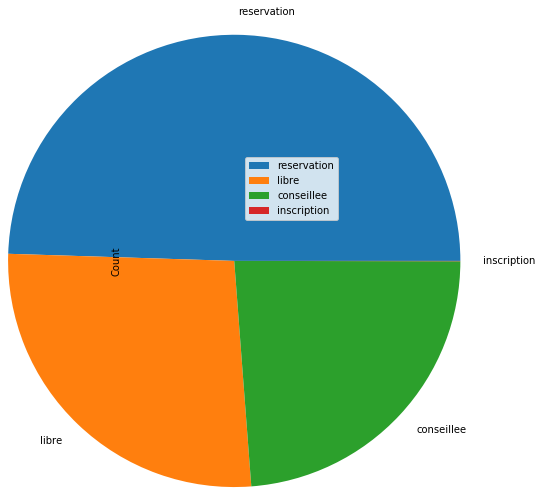

In [23]:
#let's visualise a pie chart for events by "entry type"
Key_words = pd.DataFrame(popular_events['entry'].value_counts())
Key_words.columns=['Count']
Key_words.plot(kind='pie', y='Count',legend=True,radius=2.6)

if you are going to an event in Paris make sure to reserve in advance since half of the events need reservation!

NOW LET VISUALISE THE LOCATION OF SOME EVENTS ON PARIS MAPP

In [24]:
#let's do a dataframe showing the adress and the location of the events
Paris_Events = DataFrame(dframe, columns=['Nom du lieu','Coordonnées géographiques'])
Paris_Events.head(10)

,Nom du lieu,Coordonnées géographiques
0,Médiathèque Hélène Berr,"48.842598,2.397432"
1,Librairie des Éditeurs associés,"48.8481726947,2.33968563809"
2,Bibliothèque Parmentier,"48.860193,2.37936"
3,Le Passage vers les Etoiles,"48.8629065,2.3826301"
4,Les Disquaires,"48.8538189,2.3756366"
5,La Gare Jazz,"48.8949443,2.3821416"
6,La Bellevilloise,"48.86848,2.39217"
7,Bibliothèque Louise Walser-Gaillard (ex Chaptal),"48.881101,2.33234"
8,Centre Paris Anim Daviel,"48.8281281757,2.3448459184"
9,Centre Paris Anim' Maurice Ravel,"48.84156,2.411535"


In [25]:
# let's split the corrdinates and get longitude and lattitude
dframe_coo = dframe['Coordonnées géographiques']
dframe_coo = dframe_coo.str.split(',', expand=True)
dframe_coo = dframe_coo.rename(columns = {0:'Latitude',1:'Longitude'})
dframe_coo = dframe_coo.astype(float)
dframe_coo.head()

,Latitude,Longitude
0,48.842598,2.397432
1,48.848173,2.339686
2,48.860193,2.379360
3,48.862907,2.382630
4,48.853819,2.375637


In [26]:
#using folium librairy we get the map of Paris
Paris= folium.Map(location=[48.8534088, 2.3487999], zoom_start=12)
Paris

In [27]:
# now we display four evnts on the map to show their location
Paris= folium.Map(location=[48.8534088, 2.3487999], zoom_start=12)
folium.Marker(location=[48.842598, 2.397432],tooltip= 0,popup='Mt. Hood Meadows',icon=folium.Icon(color='green')).add_to(Paris)
folium.Marker(location=[48.848173, 2.339686],tooltip= 1,popup='Mt. Hood Meadows',icon=folium.Icon(color='red')).add_to(Paris)
folium.Marker(location=[48.860193, 2.379360],tooltip= 2,popup='Mt. Hood Meadows',icon=folium.Icon(color='blue')).add_to(Paris)
folium.Marker(location=[48.862907, 2.382630],tooltip= 3,popup='Mt. Hood Meadows',icon=folium.Icon(color='orange')).add_to(Paris)
folium.Marker(location=[48.853819, 2.375637],tooltip= 4,popup='Mt. Hood Meadows',icon=folium.Icon(color='black')).add_to(Paris)
Paris

THANKS FOR WATCHING!

Sami & Ruth